# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint as pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
#len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
appid={api_key}
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"   
query_url = (f"{url}appid={api_key}&units={units}&q=") 

temp = [] #Temperature (F) vs. Latitu&e
humid = []    #Humidity (%) vs. Latitude
cloud = []    #Cloudiness (%) vs. Latitude
wind = []    #Wind Speed (mph) vs. Latitude
lat = []
lon = []
count = 0
for place in cities:
    
    response = requests.get(f"{query_url}{place}").json()
    count +=1
    print(f" Fetching record {count} of Set 1 | {place}")
    try:
        lat.append(response["coord"]["lat"])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
    except:
        print("City not found...skipping")
        lat.append("NA")
        lon.append("NA")
        temp.append("NA")
        humid.append("NA")
        cloud.append("NA")
        wind.append("NA")

weather = pd.DataFrame({"city" :cities,
                        "Latitude" : lat,
                        "Longitude" : lon,
                        "Temperature" : temp,
                        "Humidity" : humid,
                        "Cloud" : cloud,
                        "Wind" : wind})

 Fetching record 1 of Set 1 | mataura
 Fetching record 2 of Set 1 | tasiilaq
 Fetching record 3 of Set 1 | yellowknife
 Fetching record 4 of Set 1 | tuatapere
 Fetching record 5 of Set 1 | airai
 Fetching record 6 of Set 1 | chifeng
 Fetching record 7 of Set 1 | butaritari
 Fetching record 8 of Set 1 | kapaa
 Fetching record 9 of Set 1 | albany
 Fetching record 10 of Set 1 | nanortalik
 Fetching record 11 of Set 1 | kahului
 Fetching record 12 of Set 1 | rikitea
 Fetching record 13 of Set 1 | rudiskes
 Fetching record 14 of Set 1 | bredasdorp
 Fetching record 15 of Set 1 | victoria
 Fetching record 16 of Set 1 | port alfred
 Fetching record 17 of Set 1 | gisborne
 Fetching record 18 of Set 1 | vaini
 Fetching record 19 of Set 1 | taolanaro
City not found...skipping
 Fetching record 20 of Set 1 | hambantota
 Fetching record 21 of Set 1 | longyearbyen
 Fetching record 22 of Set 1 | bathsheba
 Fetching record 23 of Set 1 | ribeira grande
 Fetching record 24 of Set 1 | illoqqortoormiut
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
weather = weather[~weather.eq("NA").any(1)]
weather = weather[weather.city != 'iquitos']
weather.to_csv("weather.csv")

In [46]:
print(weather)
weather.count()

                   city Latitude Longitude Temperature Humidity Cloud   Wind
0               mataura   -46.19    168.86       73.74       53    56  18.92
1              tasiilaq    65.61    -37.64          14       40    56   5.82
2           yellowknife    62.45   -114.38      -16.61       68    20   8.05
3             tuatapere   -46.13    167.69       66.14       75    80  16.24
4                 airai    -8.93    125.41       75.63       86     0   2.04
5               chifeng    42.27    118.96        6.47       59    56   4.27
6            butaritari     3.07    172.79       85.98       95    64  17.25
7                 kapaa    22.08   -159.32        75.2       73    75  18.34
8                albany    42.65    -73.75        28.4       39    75   3.36
9            nanortalik    60.14    -45.24       26.49      100    44  50.47
10              kahului    20.89   -156.47        78.8       69    40  11.41
11              rikitea   -23.12   -134.97       80.13      100    76  34.92

city           553
Latitude       553
Longitude      553
Temperature    553
Humidity       553
Cloud          553
Wind           553
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

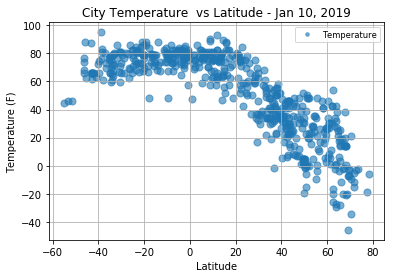

In [47]:
plt.scatter(weather["Latitude"], weather["Temperature"], s = 50, alpha=0.6, label = "Temperature", linewidth = 1)

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.legend(loc = "best", fontsize = "small", scatterpoints = 1,  markerscale= .5, scatteryoffsets=[0.5, 0.5, 0.75], fancybox = True)
plt.title("City Temperature  vs Latitude - Jan 10, 2019")
plt.savefig("Plots/Temps.png")
plt.show()

#### Latitude vs. Humidity Plot

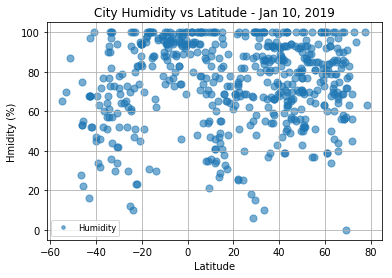

In [48]:
plt.scatter(weather["Latitude"], weather["Humidity"], s = 50, alpha=0.6, linewidth = 1)

plt.grid()
plt.xlabel( "Latitude")
plt.ylabel("Hmidity (%)")
plt.legend(loc = "best", fontsize = "small", scatterpoints = 1,  markerscale= .5, scatteryoffsets=[0.5, 0.5, 0.75], fancybox = True)

plt.title("City Humidity vs Latitude - Jan 10, 2019")
plt.savefig("Plots/Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

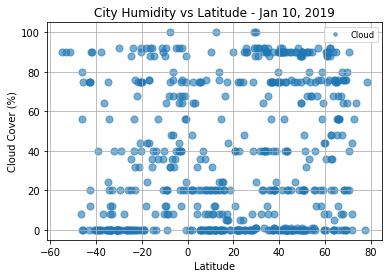

In [49]:
plt.scatter(weather["Latitude"], weather["Cloud"], s = 50, alpha=0.6, linewidth = 1)

plt.grid()
plt.xlabel("Latitude" )
plt.ylabel("Cloud Cover (%)")
plt.legend(loc = "best", fontsize = "small", scatterpoints = 1,  markerscale= .5, scatteryoffsets=[0.5, 0.5, 0.75], fancybox = True)
plt.title("City Humidity vs Latitude - Jan 10, 2019")
plt.savefig("Plots/Cloudy.png")

plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

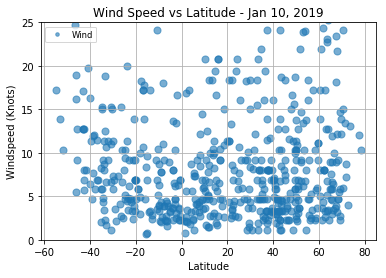

In [50]:
plt.scatter(weather["Latitude"], weather["Wind"],  vmax= 35, s = 50, alpha=0.6, linewidth = 1)

plt.grid()
plt.xlabel("Latitude" )
plt.ylabel("Windspeed (Knots)")
plt.legend(loc = "best", fontsize = "small", scatterpoints = 1,  markerscale= .5, scatteryoffsets=[0.5, 0.5, 0.75], fancybox = True)

plt.title("Wind Speed vs Latitude - Jan 10, 2019")
plt.ylim(top = 25, bottom = 0)
plt.savefig("Plots/Windy.png")

plt.show